# starting point

In [365]:
# Install necessary libraries (run only if not already installed)
# %pip install pandas matplotlib seaborn scikit-learn openpyxl umap-learn tensorflow

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('players.csv')
# all numeric columns
numeric_data = data.select_dtypes(include='number')
# players with zero appearances
players_zero_appearances = data[(data['appearances'] == 0) ]
# players with non zero appearances
players_non_zero_appearances = data[(data['appearances'] != 0) ]
# print (data.head())
print(data.columns.tolist())

['season', 'player_id', 'firstname', 'lastname', 'age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'position', 'rating', 'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']


### remove data from 2010 + data where apearence = 0 + goals_conceded         

In [366]:
# this was mooved down

# print(f'before removing 2010- {len(data)}')
# data=data[~data['season'].between(2010, 2014)]
# print(f'after removing 2010- {len(data)}')
# data=data[data['appearances'] > 0]
# print(f'after removing apearence=0- {len(data)}')
# data = data.drop(columns=['goals_conceded'])


### find nulls

In [367]:
# Count the number of missing values in each column
missing_values = data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)

age                   7
height             1367
weight             3091
rating            13778
goals_conceded     5083
dtype: int64


### Get the IDs where the rating is NaN


In [368]:
# Get the IDs where the rating is NaN
nan_rating_ids = data.loc[data['rating'].isnull(), 'player_id']
print("IDs of players with missing ratings:")
print(nan_rating_ids)

# Get the IDs where the height is NaN
nan_height_ids = data.loc[data['height'].isnull(), 'player_id']
print("\nIDs of players with missing heights:")
print(nan_height_ids)

# Get the IDs where the weight is NaN
nan_weight_ids = data.loc[data['weight'].isnull(), 'player_id']
print("\nIDs of players with missing weights:")
print(nan_weight_ids)

# Get the IDs where the age is NaN
nan_age_ids = data.loc[data['age'].isnull(), 'player_id']
print("\nIDs of players with missing ages:")
print(nan_age_ids)

IDs of players with missing ratings:
0         47411
1         98466
2        114902
3        114800
4         93990
          ...  
38350    348309
38368     30618
38371      6221
38375    470963
38376    180762
Name: player_id, Length: 13778, dtype: int64

IDs of players with missing heights:
1         98466
60       115982
310      103495
318      223786
340      233859
          ...  
38283    379068
38318    446089
38345    330405
38346    237268
38375    470963
Name: player_id, Length: 1367, dtype: int64

IDs of players with missing weights:
1         98466
33        19210
45       117512
60       115982
75        89786
          ...  
38347    289513
38349    409047
38350    348309
38362    275394
38375    470963
Name: player_id, Length: 3091, dtype: int64

IDs of players with missing ages:
8305     288115
8782     350627
10616    401098
23175    478937
23346    366382
37150    427335
38203    452398
Name: player_id, dtype: int64


# List of specific columns to plot   -  trying to find problematic values

In [369]:
# List of specific columns to plot
# columns_to_plot =['appearances', 'lineups', 'minutes_played', 'rating', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# columns_to_plot = ['dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# all numeric columns:
# columns_to_plot =['age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'rating', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# for now i left up all the data i think i have a problem with and is not right

# before omri think some are ok:
#  ['rating', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

# before fixing each plot after omri review:
# ['rating', 'goals_conceded', 'saves', 'pass_accuracy', 'total_tackles',  'dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

columns_to_plot =[]

# for column in columns_to_plot:
#     plt.figure(figsize=(8, 5))
#     # if we wanna fill NAN with 0:
#     # plt.hist(data[column].fillna(0), bins=50, alpha=0.7, color='blue')  # Replace NaN with 0
#     # if we wanna ignore NAN:
#     plt.hist(data[column].dropna(), bins=50, alpha=0.7, color='blue')  # Drop NaN values
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.xticks(rotation=90)  # Rotate x-axis labels
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()



# if we wanna ignore when apearence is 0:
for column in columns_to_plot:
    # Filter out rows where appearances == 0
    filtered_data = data[data['appearances'] != 0]
    filtered_data = filtered_data[filtered_data['minutes_played'] != 0]
    filtered_data = filtered_data[filtered_data['lineups'] != 0]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data[column].dropna(), bins=50, alpha=0.7, color='blue')  # Drop NaN values
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.grid(axis='y', alpha=0.75)
    plt.show()



# # Plot histograms for the specified columns
# data[columns_to_plot].hist(figsize=(15, 10))  # Adjust figsize as needed
# plt.tight_layout()
# plt.show()



### check players raiting + appearences

In [370]:
print("Number of players with 0 appearances:", len(players_zero_appearances))

# Additional filter for players with NaN rating (regardless of appearances)
players_with_nan_rating = data[data['rating'].isna()]
print("Total number of players with NaN rating (regardless of appearances):", len(players_with_nan_rating))

# Players with 0 appearances and NaN rating
players_zero_appearances_nan_rating = players_zero_appearances[players_zero_appearances['rating'].isna()]
print("Number of players with 0 appearances and NaN rating:", len(players_zero_appearances_nan_rating))

# Players with more than 0 appearances and NaN rating
players_non_zero_appearances_nan_rating = players_non_zero_appearances[players_non_zero_appearances['rating'].isna()]
print("Number of players with more than 0 appearances and NaN rating:", len(players_non_zero_appearances_nan_rating))


Number of players with 0 appearances: 11085
Total number of players with NaN rating (regardless of appearances): 13778
Number of players with 0 appearances and NaN rating: 10814
Number of players with more than 0 appearances and NaN rating: 2964


### players_non_zero_appearances + pass_accuracy 

Number of players with non 0 appearances: 27294
Number of players with 0% pass accuracy: 13744
Number of players with non-zero pass accuracy: 13550


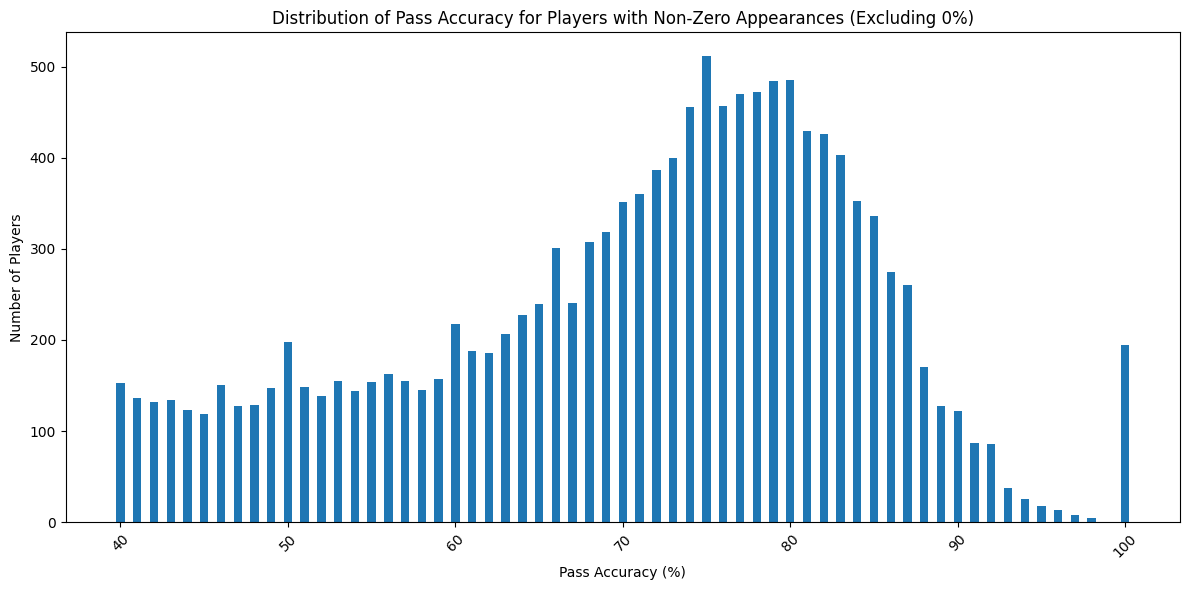

In [371]:
print("Number of players with non 0 appearances:", len(players_non_zero_appearances))
# Count the players with a pass accuracy of 0
zero_pass_accuracy_count = len(players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] == 0])
print("Number of players with 0% pass accuracy:", zero_pass_accuracy_count)

# Count the players with a pass accuracy greater than 0
non_zero_pass_accuracy_count = len(players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] > 0])
print("Number of players with non-zero pass accuracy:", non_zero_pass_accuracy_count)

# Filter out players with pass accuracy of 0 for the plot
non_zero_pass_accuracy = players_non_zero_appearances[players_non_zero_appearances['pass_accuracy'] > 0]

# Group by pass accuracy and count the number of players for each accuracy level
pass_accuracy_counts = non_zero_pass_accuracy['pass_accuracy'].value_counts().sort_index()

# Plotting the distribution of pass accuracy percentages (excluding 0%)
plt.figure(figsize=(12, 6))
plt.bar(pass_accuracy_counts.index, pass_accuracy_counts.values, width=0.5)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Number of Players')
plt.title('Distribution of Pass Accuracy for Players with Non-Zero Appearances (Excluding 0%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### players_non_zero_appearances + total_tackles

Number of players with non-zero appearances: 27294
Number of field players with 0 total tackles: 6454
Number of field players with non-zero total tackles: 18739


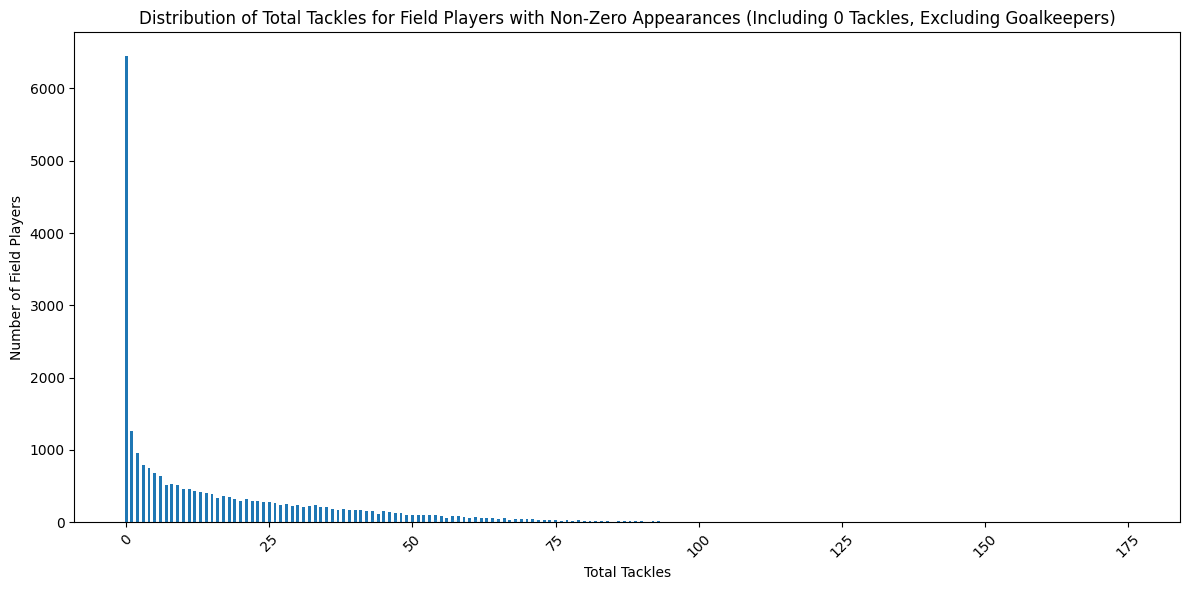

In [372]:
# Print total number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Filter out goalkeepers from players_non_zero_appearances
field_players_non_zero_appearances = players_non_zero_appearances[players_non_zero_appearances['position'] != 'Goalkeeper']

# Count the players with 0 total tackles (excluding goalkeepers)
zero_tackles_count = len(field_players_non_zero_appearances[field_players_non_zero_appearances['total_tackles'] == 0])
print("Number of field players with 0 total tackles:", zero_tackles_count)

# Count the players with more than 0 total tackles (excluding goalkeepers)
non_zero_tackles_count = len(field_players_non_zero_appearances[field_players_non_zero_appearances['total_tackles'] > 0])
print("Number of field players with non-zero total tackles:", non_zero_tackles_count)

# Group by total tackles and count the number of players for each tackle level (including 0 tackles, excluding goalkeepers)
tackles_counts = field_players_non_zero_appearances['total_tackles'].value_counts().sort_index()

# Plotting the distribution of total tackles (including 0 tackles, excluding goalkeepers)
plt.figure(figsize=(12, 6))
plt.bar(tackles_counts.index, tackles_counts.values, width=0.5)
plt.xlabel('Total Tackles')
plt.ylabel('Number of Field Players')
plt.title('Distribution of Total Tackles for Field Players with Non-Zero Appearances (Including 0 Tackles, Excluding Goalkeepers)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Filter for Goalkeepers with Goals Conceded


Total number of goalkeepers: 4461


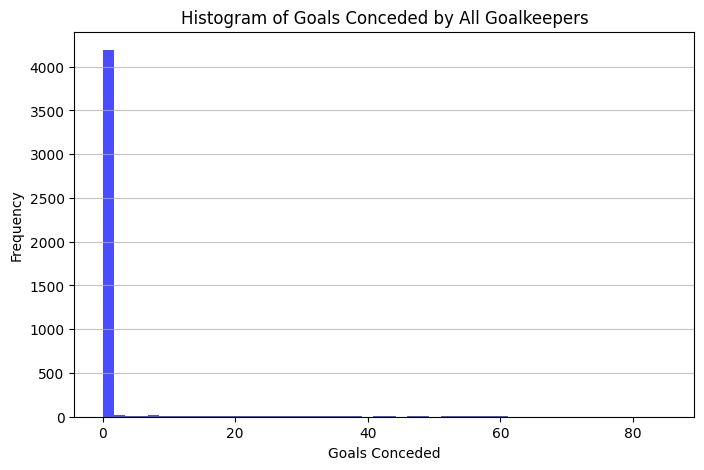

Number of goalkeepers who played games: 0


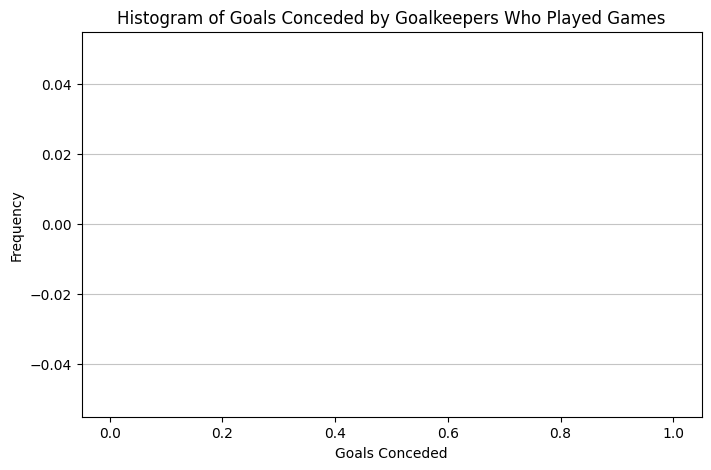

In [373]:
# Case 1: All goalkeepers
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting histogram for all goalkeepers
plt.figure(figsize=(8, 5))
plt.hist(all_goalkeepers['goals_conceded'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Goals Conceded by All Goalkeepers')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Case 2: Goalkeepers who played games (appearances > 0, minutes_played > 0, lineups > 0)
goalkeepers_played = all_goalkeepers[
    (all_goalkeepers['appearances'] > 50)
]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting histogram for goalkeepers who played games
plt.figure(figsize=(8, 5))
plt.hist(goalkeepers_played['goals_conceded'].dropna(), bins=50, alpha=0.7, color='orange')
plt.title('Histogram of Goals Conceded by Goalkeepers Who Played Games')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Filter for Goalkeepers with saves


Total number of goalkeepers: 4461


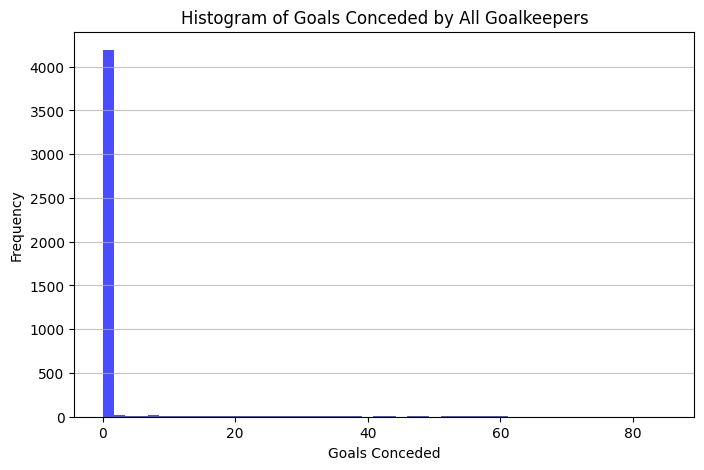

Number of goalkeepers who played games: 2101


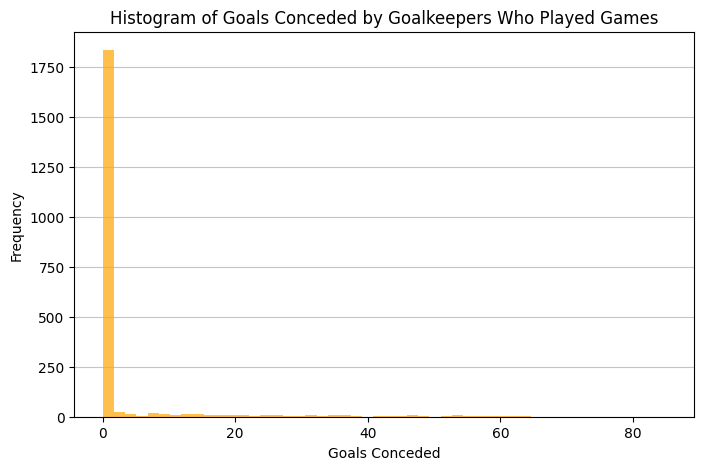

Total number of goalkeepers: 4461


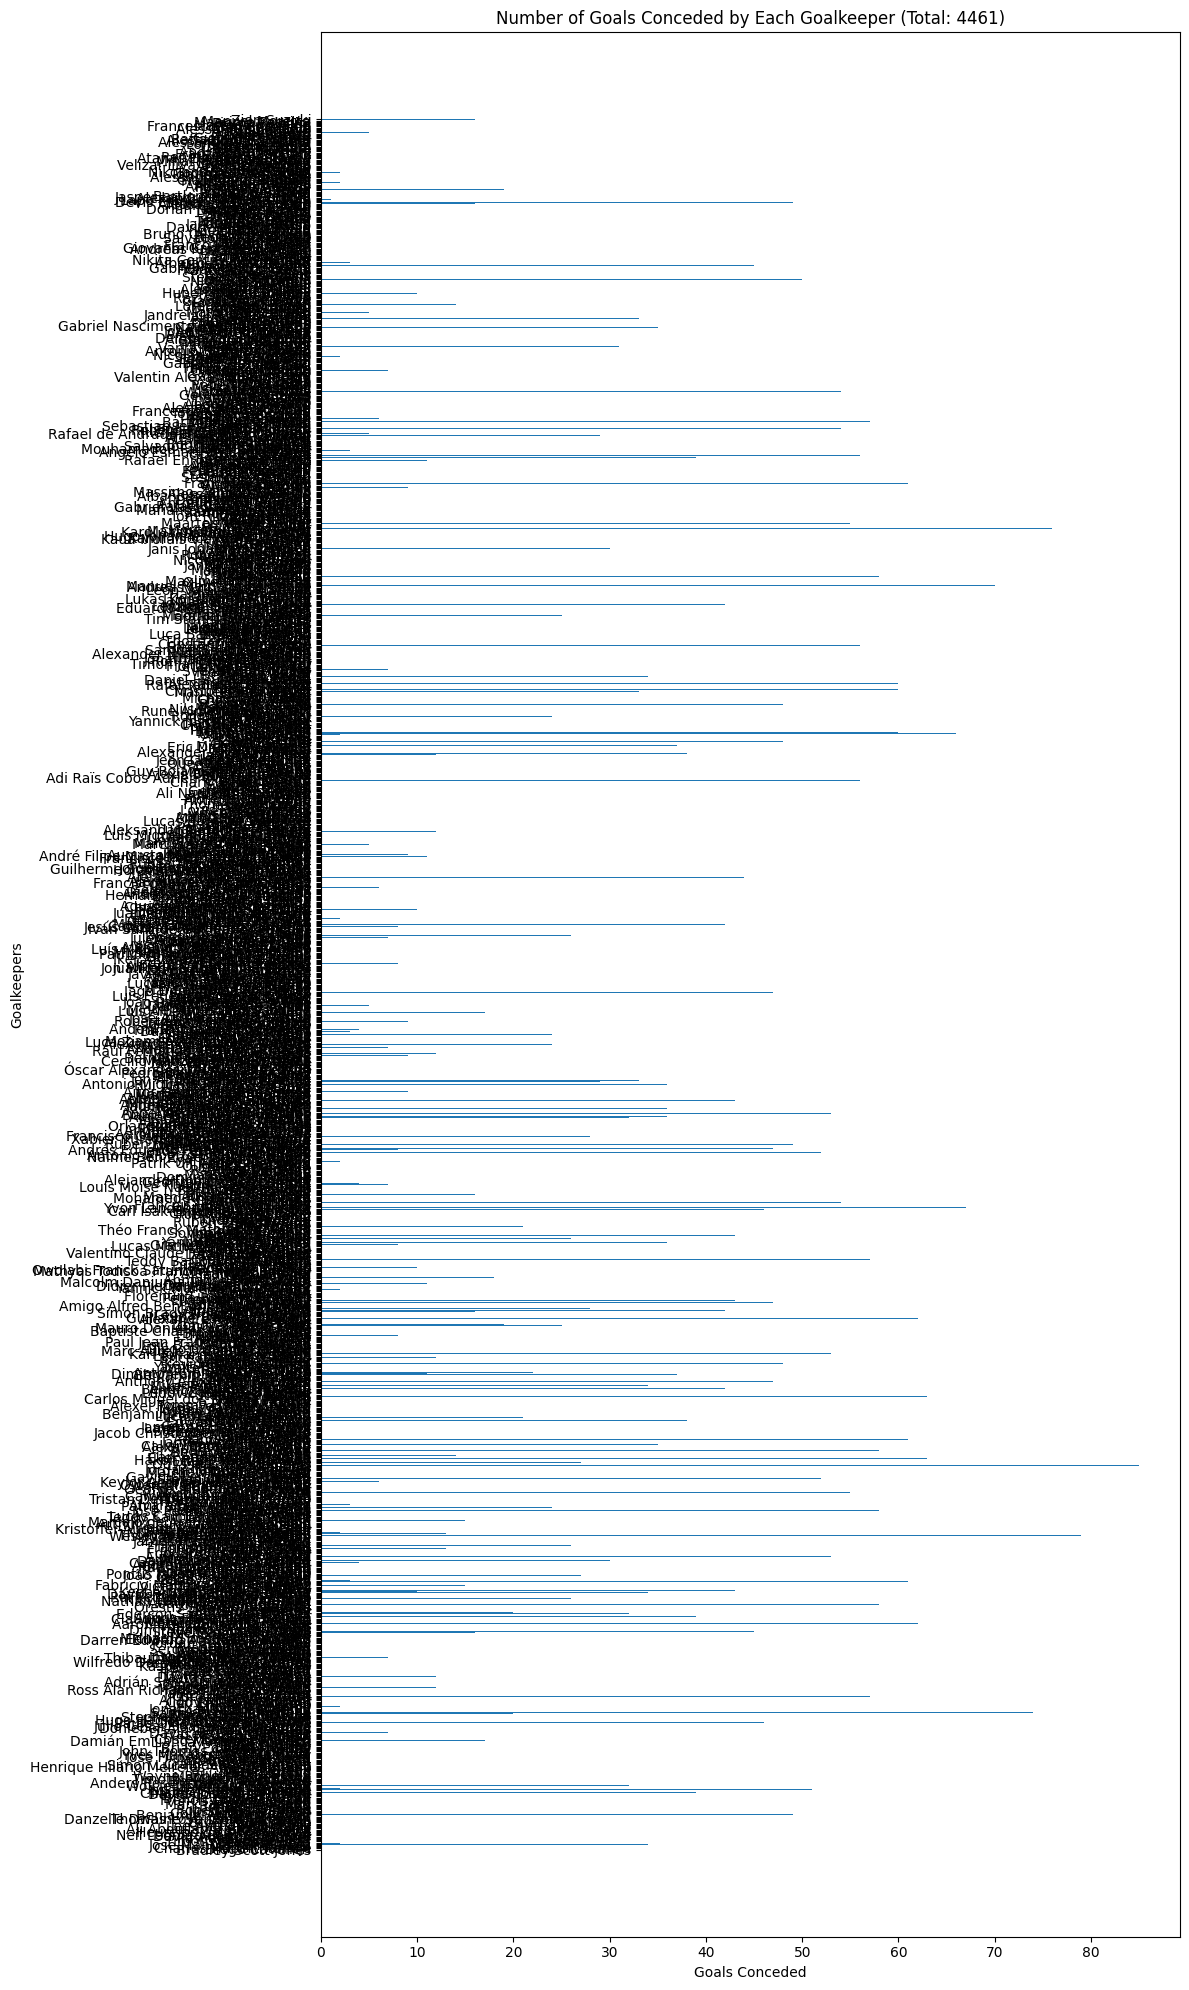

Number of goalkeepers who played games: 2101


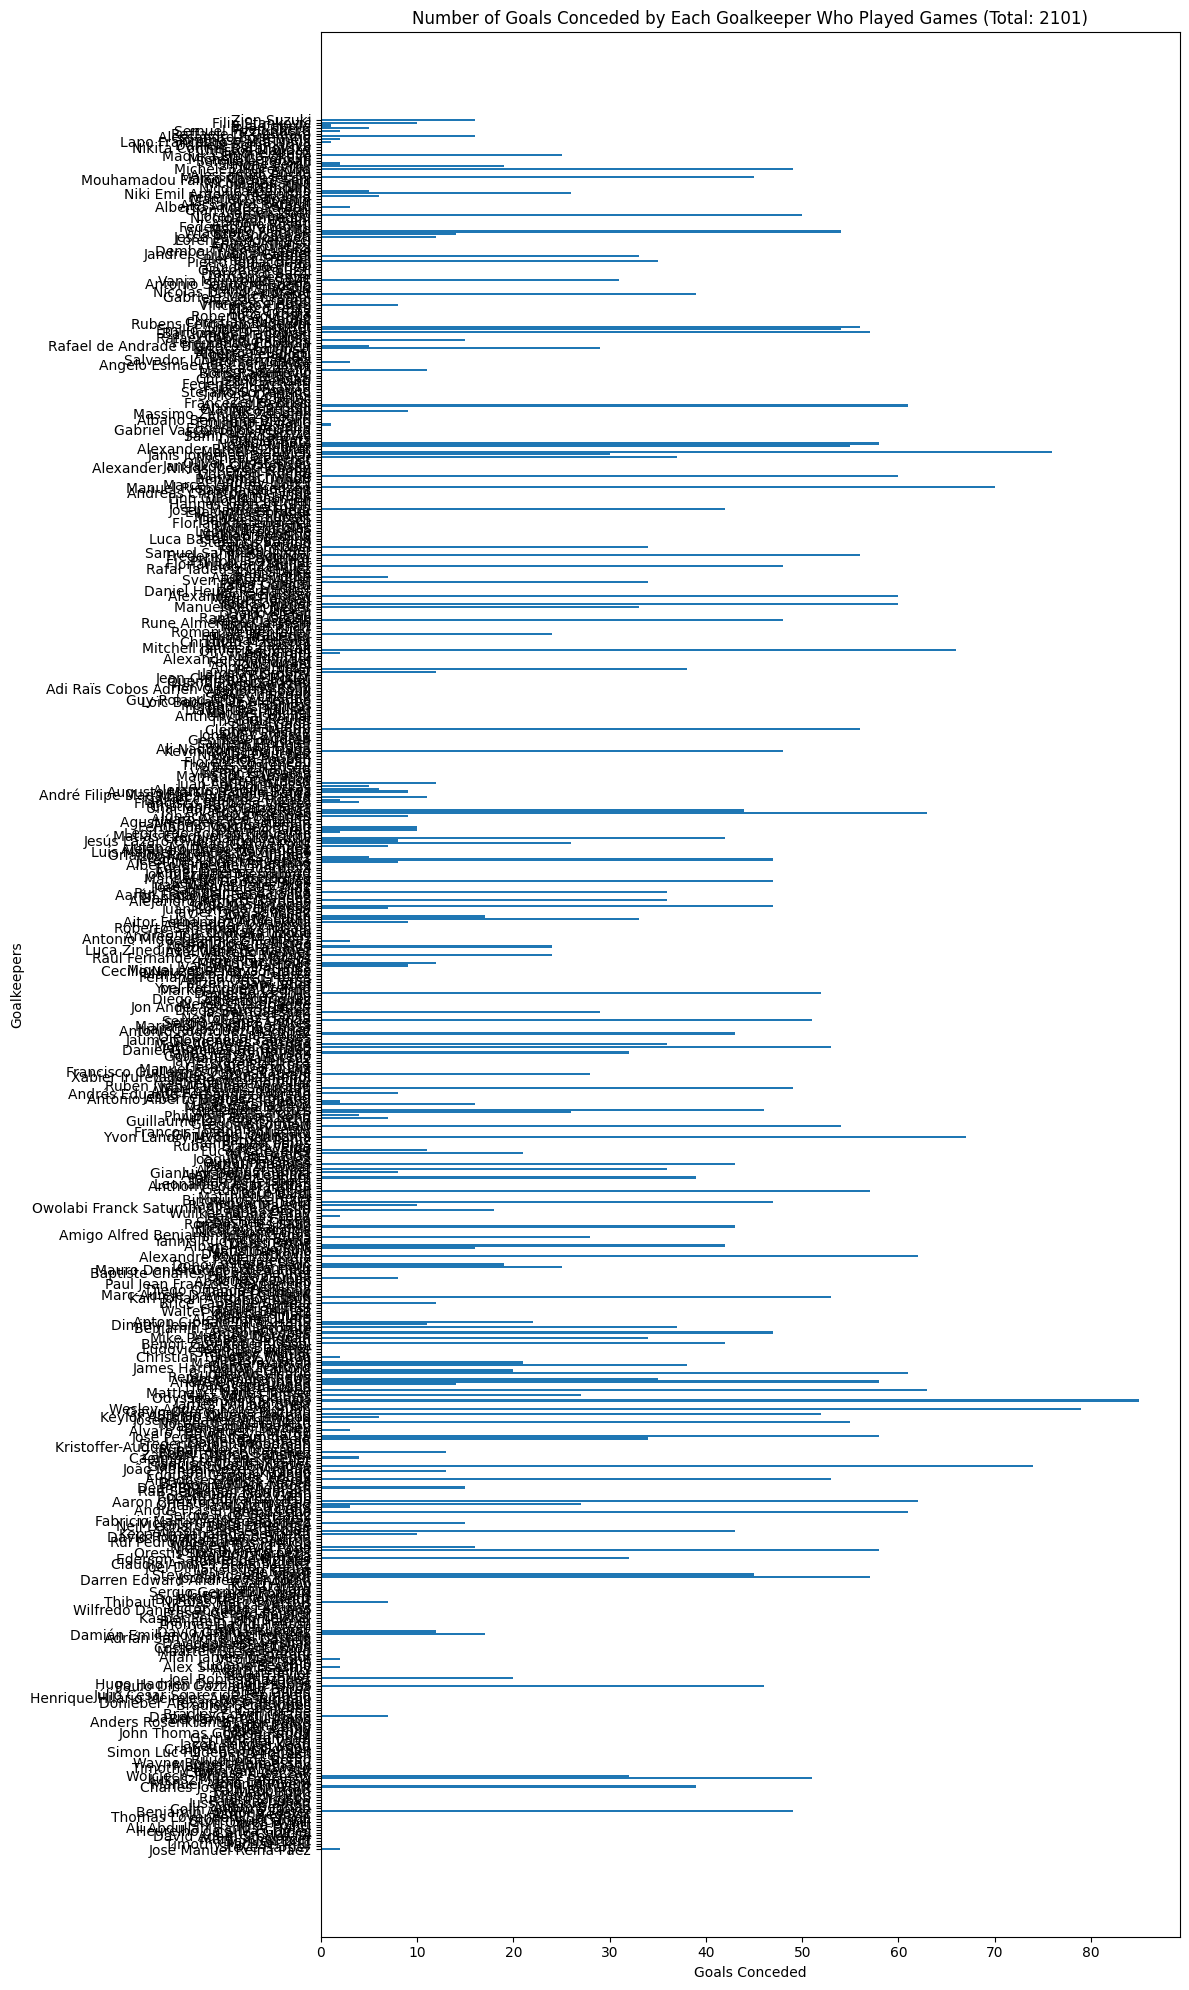

In [374]:
# Case 1: All goalkeepers
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting histogram for all goalkeepers
plt.figure(figsize=(8, 5))
plt.hist(all_goalkeepers['goals_conceded'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Goals Conceded by All Goalkeepers')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Case 2: Goalkeepers who played games (appearances > 0, minutes_played > 0, lineups > 0)
goalkeepers_played = all_goalkeepers[(all_goalkeepers['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting histogram for goalkeepers who played games
plt.figure(figsize=(8, 5))
plt.hist(goalkeepers_played['goals_conceded'].dropna(), bins=50, alpha=0.7, color='orange')
plt.title('Histogram of Goals Conceded by Goalkeepers Who Played Games')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



# Old code
# filter for goalkeapers + goals_conceded 
goalkeepers = data[data['position'] == 'Goalkeeper']

# Filter for all goalkeepers
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting the number of goals conceded by each goalkeeper (all goalkeepers)
plt.figure(figsize=(12, 20))
plt.barh(all_goalkeepers['firstname'] + ' ' + all_goalkeepers['lastname'], all_goalkeepers['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper (Total: {num_all_goalkeepers})')
plt.tight_layout()
plt.show()

# Filter for goalkeepers who have played games (appearances > 0)
goalkeepers_played = data[(data['position'] == 'Goalkeeper') & (data['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting the number of goals conceded by each goalkeeper who played games
plt.figure(figsize=(12, 20))
plt.barh(goalkeepers_played['firstname'] + ' ' + goalkeepers_played['lastname'], goalkeepers_played['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper Who Played Games (Total: {num_goalkeepers_played})')
plt.tight_layout()
plt.show()


### players_non_zero_appearances + Dribbled past

Number of players with non-zero appearances: 27294
Number of players with 0 dribbled past: 27294
Number of players with non-zero dribbled past: 0


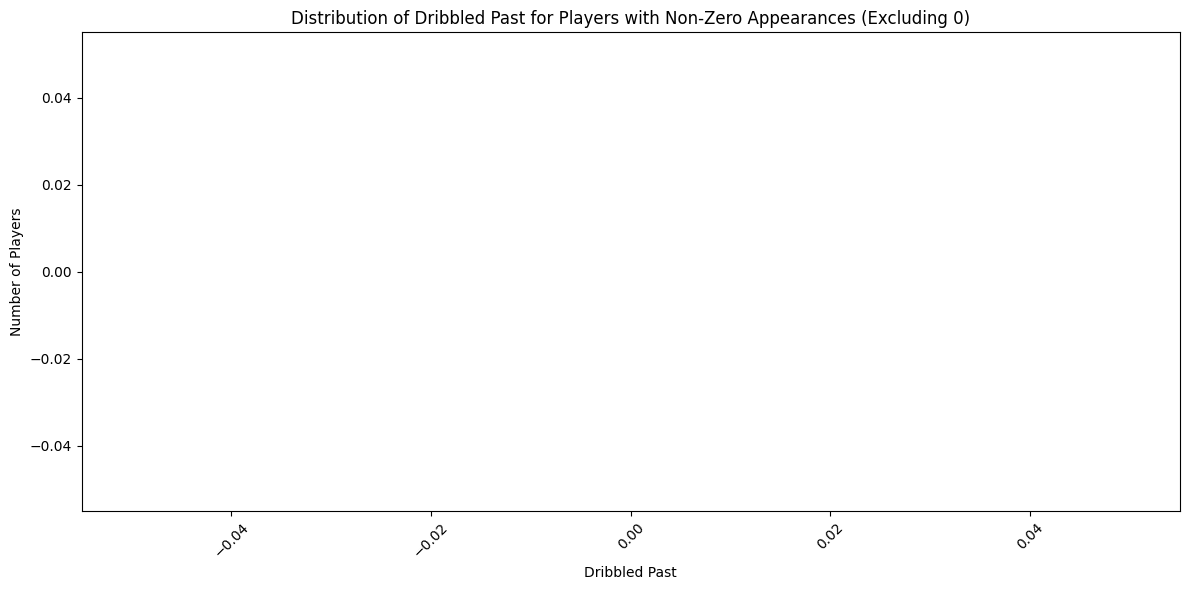

In [375]:
# Print the number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Count the players with a Dribbled Past value of 0
zero_dribbled_past_count = len(players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] == 0])
print("Number of players with 0 dribbled past:", zero_dribbled_past_count)

# Count the players with a Dribbled Past value greater than 0
non_zero_dribbled_past_count = len(players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] > 0])
print("Number of players with non-zero dribbled past:", non_zero_dribbled_past_count)

# Filter out players with Dribbled Past of 0 for the plot
non_zero_dribbled_past = players_non_zero_appearances[players_non_zero_appearances['dribbled_past'] > 0]

# Group by Dribbled Past and count the number of players for each level
dribbled_past_counts = non_zero_dribbled_past['dribbled_past'].value_counts().sort_index()

# Plotting the distribution of Dribbled Past (excluding 0)
plt.figure(figsize=(12, 6))
plt.bar(dribbled_past_counts.index, dribbled_past_counts.values, width=0.5)
plt.xlabel('Dribbled Past')
plt.ylabel('Number of Players')
plt.title('Distribution of Dribbled Past for Players with Non-Zero Appearances (Excluding 0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### penalties data

In [376]:
# Group by season and calculate the sum for each specified column
penalties_and_cards_summary = players_non_zero_appearances.groupby('season')[
    ['penalties_scored', 'penalties_missed', 'penalties_saved', 'penalties_committed', 
     'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won']
].sum()

# Print the result
print(penalties_and_cards_summary)




        penalties_scored  penalties_missed  penalties_saved  \
season                                                        
2010                   0                 0                0   
2011                   0                 0                0   
2012                   0                 0                0   
2013                   0                 0                0   
2014                   2                 0                0   
2015                 336               101               86   
2016                 419               144              110   
2017                 369               135              115   
2018                 444               113               91   
2019                 447               114               91   
2020                 532               129              164   
2021                 403                90              114   
2022                 411               131              153   
2023                 416                98             

### hight and weight problems

In [377]:
# Print the number of players with non-zero appearances
print("Number of players with non-zero appearances:", len(players_non_zero_appearances))

# Count players with missing height
missing_height_count = len(players_non_zero_appearances[players_non_zero_appearances['height'].isna()])
print("Number of players with non-zero appearances and missing height:", missing_height_count)

# Count players with missing weight
missing_weight_count = len(players_non_zero_appearances[players_non_zero_appearances['weight'].isna()])
print("Number of players with non-zero appearances and missing weight:", missing_weight_count)

# Count players with missing age
missing_age_count = len(players_non_zero_appearances[players_non_zero_appearances['age'].isna()])
print("Number of players with non-zero appearances and missing age:", missing_age_count)



Number of players with non-zero appearances: 27294
Number of players with non-zero appearances and missing height: 162
Number of players with non-zero appearances and missing weight: 626
Number of players with non-zero appearances and missing age: 0


# updated table for LSTM - FOR MANU

In [378]:
lstm_data = players_non_zero_appearances.copy()

# removing data 
print(f'before removing 2010- {len(lstm_data)}')
lstm_data=lstm_data[~lstm_data['season'].between(2010, 2014)]
print(f'after removing 2010- {len(lstm_data)}')
lstm_data=lstm_data[lstm_data['appearances'] > 0]
print(f'after removing apearence=0- {len(lstm_data)}')

# Specify columns to drop
columns_to_drop = ['season', 'firstname', 'lastname', 'rating','goals_conceded']

# Drop the specified columns
lstm_data.drop(columns=columns_to_drop, inplace=True)

print(lstm_data.columns.to_list())

before removing 2010- 27294
after removing 2010- 24788
after removing apearence=0- 24788
['player_id', 'age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'position', 'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']


# heatmap + corelations

In [379]:
# Filter columns to include only existing ones
filtered_data = numeric_data[numeric_data.columns]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Filter correlations greater than 0.75 or less than -0.75, excluding self-correlations
correlation_threshold = 0.6
high_correlation_pairs = (
    correlation_matrix
    .stack()  # Convert matrix to long format
    .reset_index()  # Convert to DataFrame
    .rename(columns={0: 'correlation', 'level_0': 'column_1', 'level_1': 'column_2'})  # Rename columns
)

# Filter for strong correlations and exclude self-correlations
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs['correlation'] > correlation_threshold) |
    (high_correlation_pairs['correlation'] < -correlation_threshold)
]
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['column_1'] != high_correlation_pairs['column_2']]

# Remove mirror pairs by keeping only one direction
high_correlation_pairs = high_correlation_pairs[
    high_correlation_pairs['column_1'] < high_correlation_pairs['column_2']
]

# Sort by absolute correlation value for better readability
high_correlation_pairs['abs_correlation'] = high_correlation_pairs['correlation'].abs()
high_correlation_pairs = high_correlation_pairs.sort_values(by='abs_correlation', ascending=False)

# *****************************************************************
# i moove this to be comment for now , you can remove if neede 
# *****************************************************************

# Export to Excel file
# output_file = 'filtered_high_correlations.xlsx'
# high_correlation_pairs[['column_1', 'column_2', 'correlation']].to_excel(output_file, index=False)
# print(f"High correlation pairs exported to {output_file}")

# # Display column pairs with high correlations
# print(high_correlation_pairs[['column_1', 'column_2', 'correlation']].to_string(index=False))

# # Generate and display the heatmap
# plt.figure(figsize=(20, 20))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Heatmap of Selected Features')
# plt.show()


# encoding

In [380]:
encoding_data=lstm_data.copy()



## scaling

In [381]:
# print(encoding_data.columns.to_list())
# print(encoding_data.head())

# Perform one-hot encoding on the 'position' column
encoding_data = pd.get_dummies(encoding_data, columns=['position'], prefix='position')
# change the captain to be 1\0 instead of True\False
encoding_data['captain'] = encoding_data['captain'].astype(int)

non_numeric_columns = encoding_data.select_dtypes(exclude=['number']).columns

# Convert 'height' and 'weight' to numeric
encoding_data['height'] = pd.to_numeric(encoding_data['height'], errors='coerce')
encoding_data['weight'] = pd.to_numeric(encoding_data['weight'], errors='coerce')

# Recheck for non-numeric columns
non_numeric_columns = encoding_data.select_dtypes(exclude=['number']).columns

# Check if all columns are numeric
if non_numeric_columns.empty:
    print("All columns are numeric. Ready for scaling.")
else:
    print("The following columns are not numeric:")
    # print(non_numeric_columns)

print(f'encoding_data before dropna {len(encoding_data)}')
encoding_data.dropna(inplace=True)
print(f'encoding_data after dropna {len(encoding_data)}')

print(encoding_data.columns.to_list())

# Define the columns to scale (exclude 'player_id')
columns_to_scale = [col for col in encoding_data.columns if col != 'player_id']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(encoding_data[columns_to_scale])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add the 'player_id' column back to the scaled DataFrame
scaled_df['player_id'] = encoding_data['player_id'].values

# Reorder columns to have 'player_id' first
scaled_df = scaled_df[['player_id'] + columns_to_scale]

# Display the resulting DataFrame
print(scaled_df)

All columns are numeric. Ready for scaling.
encoding_data before dropna 24788
player_id                0
age                      0
height                 172
weight                 628
appearances              0
lineups                  0
minutes_played           0
captain                  0
substitutions_in         0
substitutions_out        0
bench_appearances        0
total_shots              0
shots_on_target          0
total_goals              0
assists                  0
saves                    0
total_passes             0
key_passes               0
pass_accuracy            0
total_tackles            0
blocks                   0
interceptions            0
total_duels              0
duels_won                0
dribble_attempts         0
successful_dribbles      0
dribbled_past            0
fouls_drawn              0
fouls_committed          0
yellow_cards             0
yellow_red_cards         0
red_cards                0
penalties_won            0
penalties_committed      0
pena

## model tests for encoding

In [383]:
saved_data = scaled_df.copy()

### PCA

In [ ]:
pca_data = saved_data.copy()
pca_data = pca_data.drop(columns=['player_id'])

# Check the mean and standard deviation of the scaled data 
print("Mean of scaled data:")
print(pca_data.mean())

print("Standard deviation of scaled data:")
print(pca_data.std())

print (pca_data.head())


Mean of scaled data:
player_id              4.169527e+04
age                   -2.352888e-17
height                -1.505848e-16
weight                 3.105812e-16
appearances            9.646840e-17
lineups               -3.529332e-18
minutes_played         2.352888e-17
captain                0.000000e+00
substitutions_in       6.588086e-17
substitutions_out     -1.882310e-17
bench_appearances      0.000000e+00
total_shots           -1.999955e-17
shots_on_target       -4.646954e-17
total_goals           -2.705821e-17
assists                3.646976e-17
saves                 -2.852877e-17
total_passes          -4.588131e-17
key_passes            -2.941110e-17
pass_accuracy          1.176444e-16
total_tackles          8.470396e-17
blocks                -9.411552e-18
interceptions         -5.176353e-17
total_duels            7.058664e-17
duels_won              4.705776e-18
dribble_attempts      -7.999819e-17
successful_dribbles    2.117599e-17
dribbled_past          0.000000e+00
fouls_d

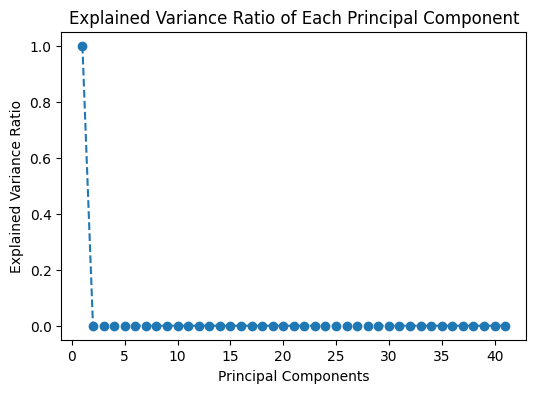

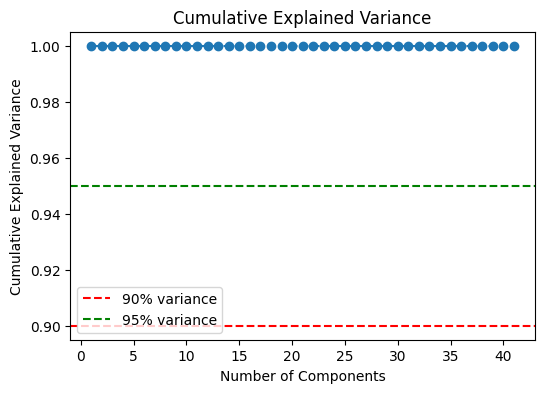

Cumulative explained variance:
[0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
Number of components that explain 95.0% variance: 1


In [385]:

# Apply PCA to the entire dataset (pca_data), which contains all the features
pca = PCA()  # Apply PCA to all the features in pca_data
pca.fit(pca_data)  # Fit PCA on the entire dataset

# Plot the explained variance ratio for each component
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance plot
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(0.95, color='g', linestyle='--', label='95% variance')
plt.legend()
plt.show()


# Print the cumulative variance to check which component number to choose
print("Cumulative explained variance:")
print(cumulative_variance)

threshold = 0.95  # You can adjust this based on your needs
n_components = (cumulative_variance >= threshold).argmax() + 1
print(f"Number of components that explain {threshold * 100}% variance: {n_components}")


